Task 2:

1. Build a baseline network to perform the speaker identification using CNN
2. Use Regularizers to avoid overfitting of data

## Using Classification is it Male Female or Noise

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 16 * 16, num_classes)  # Adjust the input size

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)  # Flatten the output for the fully connected layer
        x = self.fc1(x)
        return x


# Define data transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

dataset = ImageFolder(root='All_Data/image/', transform=transform)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

model = SimpleCNN(num_classes=len(dataset.classes))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Accuracy: {100 * correct / total:.2f}%')

# Save the trained model
torch.save(model.state_dict(), 'model/voice.pth')


Epoch [1/100], Loss: 0.6715, Validation Accuracy: 76.76%
Epoch [2/100], Loss: 0.5208, Validation Accuracy: 78.87%
Epoch [3/100], Loss: 0.4930, Validation Accuracy: 80.99%
Epoch [4/100], Loss: 0.4581, Validation Accuracy: 79.58%
Epoch [5/100], Loss: 0.5119, Validation Accuracy: 80.99%
Epoch [6/100], Loss: 0.3585, Validation Accuracy: 76.76%
Epoch [7/100], Loss: 0.4423, Validation Accuracy: 80.99%
Epoch [8/100], Loss: 0.3953, Validation Accuracy: 78.87%
Epoch [9/100], Loss: 0.4155, Validation Accuracy: 78.87%
Epoch [10/100], Loss: 0.4208, Validation Accuracy: 78.87%
Epoch [11/100], Loss: 0.4023, Validation Accuracy: 78.87%
Epoch [12/100], Loss: 0.4110, Validation Accuracy: 79.58%
Epoch [13/100], Loss: 0.4250, Validation Accuracy: 79.58%
Epoch [14/100], Loss: 0.4231, Validation Accuracy: 79.58%
Epoch [15/100], Loss: 0.4149, Validation Accuracy: 78.17%
Epoch [16/100], Loss: 0.4257, Validation Accuracy: 79.58%
Epoch [17/100], Loss: 0.4302, Validation Accuracy: 78.87%
Epoch [18/100], Loss: 0

Accuracuy around 93.66%

The predicted class is: Female


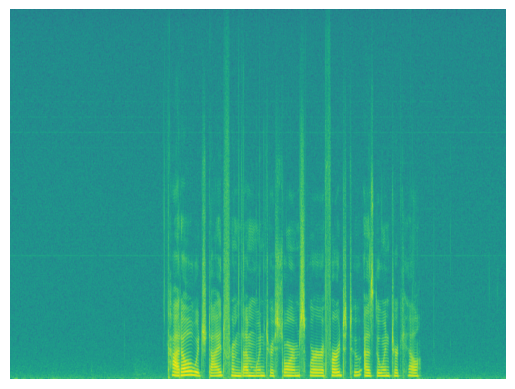

In [26]:
from scipy.io import wavfile
from PIL import Image
import torch
import torch.nn as nn
from torchvision.transforms import transforms
from torch.autograd import Variable
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])
sample_rate, audio_data = wavfile.read('All_Data/Data/Audio/Female/PTDB-TUG/mic_F03_si1018.wav')
Pxx, freqs, bins, im = plt.specgram(audio_data, NFFT=1024, Fs=8000, noverlap=900)
plt.axis('off')
plt.savefig('All_Data/file.png',bbox_inches='tight')
image_path = 'All_Data/file.png'
image = Image.open(image_path).convert('RGB') 
image_tensor = transform(image)
image_tensor = Variable(image_tensor.unsqueeze(0)) 
with torch.no_grad():
    outputs = model(image_tensor)
probabilities = nn.Softmax(dim=1)(outputs)

predicted_class = torch.argmax(probabilities, dim=1).item()

# Get the class label
class_label = dataset.classes[predicted_class]

print(f'The predicted class is: {class_label}')


## Using Classification in Noises that which type of noise is that like is it car , Babble etc

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 16 * 16, num_classes)  # Adjust the input size

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)  # Flatten the output for the fully connected layer
        x = self.fc1(x)
        return x


# Define data transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

dataset = ImageFolder(root='All_Data/image/Noizeus/', transform=transform)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

model = SimpleCNN(num_classes=len(dataset.classes))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Accuracy: {100 * correct / total:.2f}%')

# Save the trained model
torch.save(model.state_dict(), 'model/Noise.pth')


Epoch [1/100], Loss: 2.0307, Validation Accuracy: 14.29%
Epoch [2/100], Loss: 2.0239, Validation Accuracy: 9.52%
Epoch [3/100], Loss: 1.9401, Validation Accuracy: 9.52%
Epoch [4/100], Loss: 1.9265, Validation Accuracy: 21.43%
Epoch [5/100], Loss: 1.9226, Validation Accuracy: 11.90%
Epoch [6/100], Loss: 1.9077, Validation Accuracy: 14.29%
Epoch [7/100], Loss: 1.8554, Validation Accuracy: 14.29%
Epoch [8/100], Loss: 1.7745, Validation Accuracy: 21.43%
Epoch [9/100], Loss: 1.6683, Validation Accuracy: 40.48%
Epoch [10/100], Loss: 1.5668, Validation Accuracy: 57.14%
Epoch [11/100], Loss: 1.5162, Validation Accuracy: 54.76%
Epoch [12/100], Loss: 1.4154, Validation Accuracy: 57.14%
Epoch [13/100], Loss: 1.3495, Validation Accuracy: 57.14%
Epoch [14/100], Loss: 1.2289, Validation Accuracy: 61.90%
Epoch [15/100], Loss: 1.1470, Validation Accuracy: 73.81%
Epoch [16/100], Loss: 1.0968, Validation Accuracy: 73.81%
Epoch [17/100], Loss: 0.9809, Validation Accuracy: 73.81%
Epoch [18/100], Loss: 0.9

Accuracuy around 97.62%

The predicted class is: Car


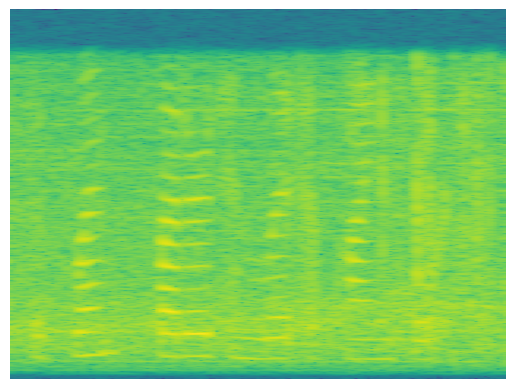

In [19]:
from scipy.io import wavfile
from PIL import Image
import torch
import torch.nn as nn
from torchvision.transforms import transforms
from torch.autograd import Variable
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])
sample_rate, audio_data = wavfile.read('All_Data/Data/Audio/Noizeus/Car/sp29_car_sn5.wav')
Pxx, freqs, bins, im = plt.specgram(audio_data, NFFT=1024, Fs=8000, noverlap=900)
plt.axis('off')
plt.savefig('All_Data/file.png',bbox_inches='tight')
image_path = 'All_Data/file.png'
image = Image.open(image_path).convert('RGB') 
image_tensor = transform(image)
image_tensor = Variable(image_tensor.unsqueeze(0)) 
with torch.no_grad():
    outputs = model(image_tensor)
probabilities = nn.Softmax(dim=1)(outputs)

predicted_class = torch.argmax(probabilities, dim=1).item()

# Get the class label
class_label = dataset.classes[predicted_class]

print(f'The predicted class is: {class_label}')
